## Introduction

In this notebook, I process Cell Painting morphological profiles from multiple datasets (e.g. FMP, LINCS, MEDINA, LOPAC, etc.). The main steps include:
	•	Loading and concatenating morphological feature tables.
	•	Filtering metadata and aligning compound IDs.
	•	Aggregating replicate-level profiles into compound-level representations using different statistical strategies (mean, geometric mean, etc.).

The goal is to produce a unified morphological feature matrix that can be merged with compound annotations for MoA classification.

In [1]:
import numpy as np
import pandas as pd

from datetime import date

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# paths to data
cell_painting_path = "cell_painting/"
save_path = "result/"

In [3]:
# Load the data
df_MEDINA_HepG2 = pd.read_csv(cell_painting_path + '2025-04-14_MEDINA_HepG2_norm_reduced_filtered_median.csv')
# set the cell line source and cell line name
df_MEDINA_HepG2['Metadata_Cell_Line_Source'] = 'MEDINA'
df_MEDINA_HepG2['Metadata_Cell_Line'] = 'HepG2'

df_FMP_HepG2 = pd.read_csv(cell_painting_path + '2025-04-10_FMP_HepG2_norm_reduced_filtered_median.csv')
df_FMP_HepG2['Metadata_Cell_Line_Source'] = 'FMP'
df_FMP_HepG2['Metadata_Cell_Line'] = 'HepG2'

df_IMTM_HepG2 = pd.read_csv(cell_painting_path + '2025-04-14_IMTM_HepG2_norm_reduced_filtered_median.csv')
df_IMTM_HepG2['Metadata_Cell_Line_Source'] = 'IMTM'
df_IMTM_HepG2['Metadata_Cell_Line'] = 'HepG2'

df_USC_HepG2 = pd.read_csv(cell_painting_path + '2025-04-14_USC_HepG2_norm_reduced_filtered_median.csv')
df_USC_HepG2['Metadata_Cell_Line_Source'] = 'USC'
df_USC_HepG2['Metadata_Cell_Line'] = 'HepG2'

df_FMP_U2OS = pd.read_csv(cell_painting_path + '2025-04-10_FMP_U2OS_norm_reduced_filtered_median.csv')
df_FMP_U2OS['Metadata_Cell_Line_Source'] = 'FMP'
df_FMP_U2OS['Metadata_Cell_Line'] = 'U2OS'

print('MEDINA_HepG2', df_MEDINA_HepG2.shape)
print('FMP_HepG2', df_FMP_HepG2.shape)
print('IMTM_HepG2', df_IMTM_HepG2.shape)
print('USC_HepG2', df_USC_HepG2.shape)
print('FMP_U2OS', df_FMP_U2OS.shape)

MEDINA_HepG2 (767, 581)
FMP_HepG2 (801, 660)
IMTM_HepG2 (600, 636)
USC_HepG2 (601, 633)
FMP_U2OS (1345, 744)


All datasets has different columns count. It is not clear how they will need to be merged with each other.

In [4]:
# concat all dataframes
cell_lines_dfs = [df_MEDINA_HepG2, df_FMP_HepG2, df_IMTM_HepG2, df_USC_HepG2, df_FMP_U2OS]
cell_lines_df = pd.concat(cell_lines_dfs, ignore_index=True, sort=False)

# get all metadata columns
metadata_cols = [col for col in cell_lines_df.columns if col.startswith('Metadata_')]
other_cols = [col for col in cell_lines_df.columns if not col.startswith('Metadata_')]

# reorder the columns
cell_lines_df = cell_lines_df[metadata_cols + other_cols]

# save the dataframe
filename = save_path + str(date.today()) + "_cell_lines.csv"
cell_lines_df.to_csv(filename, index = False)

cell_lines_df

Metadata_EOS Metadata_Plate  Metadata_Concentration Metadata_Partner  \
0       EOS100001          B1001                      10       Bioactives   
1       EOS100002          B1001                      10       Bioactives   
2       EOS100005          B1001                      10       Bioactives   
3       EOS100009          B1001                      10       Bioactives   
4       EOS100012          B1001                      10       Bioactives   
...           ...            ...                     ...              ...   
4109  Tetrandrine          B1003                       5       Bioactives   
4110  Tetrandrine          B1004                       5       Bioactives   
4111  Tetrandrine          B1005                       5       Bioactives   
4112  Tetrandrine          B1006                       5       Bioactives   
4113  Tetrandrine          B1007                       5       Bioactives   

     Metadata_Cell_Line_Source Metadata_Cell_Line  Nuc_AreaShape_Compactness  \
0                       MEDINA              HepG2                  -6.590492   
1                       MEDINA              HepG2                  -5.097065   
2                       MEDINA              HepG2                  -6.006318   
3                       MEDINA              HepG2                  -3.391839   
4                       MEDINA              HepG2                  -2.507537   
...                        ...                ...                        ...   
4109                       FMP               U2OS                  -2.597152   
4110                       FMP               U2OS                  -3.649772   
4111                       FMP               U2OS                  -3.009349   
4112                       FMP               U2OS                  -2.797453   
4113                       FMP               U2OS                  -3.610675   

      Nuc_AreaShape_Eccentricity  Nuc_AreaShape_FormFactor  \
0                      -8.404484                  6.984674   
1                      -4.164862                  5.312737   
2                      -5.006615                  6.271201   
3                      -2.378292                  3.505277   
4                      -2.062432                  2.570656   
...                          ...                       ...   
4109                         NaN                  2.646222   
4110                         NaN                  3.718083   
4111                         NaN                  3.063894   
4112                         NaN                  2.840048   
4113                         NaN                  3.685914   

      Nuc_AreaShape_MaxFeretDiameter  ...  \
0                           2.767641  ...   
1                          -0.491391  ...   
2                          -0.871079  ...   
3                          -0.295137  ...   
4                           5.211999  ...   
...                              ...  ...   
4109                             NaN  ...   
4110                             NaN  ...   
4111                             NaN  ...   
4112                             NaN  ...   
4113                             NaN  ...   

      Cyto_Texture_InfoMeas2_Mito_3_00_256  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
4109                              1.381914   
4110                              1.919544   
4111                              1.423838   
4112                              2.015269   
4113                              1.741899   

      Cyto_Texture_InverseDifferenceMoment_AGP_5_01_256  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                           

Let's research the dataset:

In [5]:
cell_lines_df[['Metadata_Cell_Line', 'Metadata_Cell_Line_Source']].value_counts()

Metadata_Cell_Line  Metadata_Cell_Line_Source
U2OS                FMP                          1345
HepG2               FMP                           801
                    MEDINA                        767
                    USC                           601
                    IMTM                          600
dtype: int64

In [6]:
# Total number of unique Metadata_EOS
len(cell_lines_df['Metadata_EOS'].unique())

1715

In [7]:
# Number of non-unique elements between cell lines
eos_value_counts = cell_lines_df['Metadata_EOS'].value_counts()
len(eos_value_counts[eos_value_counts > 1].index.tolist())

952

In [8]:
cell_lines_df[cell_lines_df['Metadata_EOS'] == 'EOS100028']

Metadata_EOS Metadata_Plate  Metadata_Concentration Metadata_Partner  \
9       EOS100028          B1001                      10       Bioactives   
772     EOS100028          B1001                      10       Bioactives   
2174    EOS100028          B1001                      10       Bioactives   
2786    EOS100028          B1001                      10       Bioactives   

     Metadata_Cell_Line_Source Metadata_Cell_Line  Nuc_AreaShape_Compactness  \
9                       MEDINA              HepG2                   2.365188   
772                        FMP              HepG2                   1.411804   
2174                       USC              HepG2                   7.492130   
2786                       FMP               U2OS                   2.862146   

      Nuc_AreaShape_Eccentricity  Nuc_AreaShape_FormFactor  \
9                       1.563060                 -2.323573   
772                     0.888907                       NaN   
2174                    1.921627                 -7.139118   
2786                         NaN                 -2.785470   

      Nuc_AreaShape_MaxFeretDiameter  ...  \
9                           5.118608  ...   
772                         4.238958  ...   
2174                             NaN  ...   
2786                             NaN  ...   

      Cyto_Texture_InfoMeas2_Mito_3_00_256  \
9                                      NaN   
772                                    NaN   
2174                                   NaN   
2786                              0.808133   

      Cyto_Texture_InverseDifferenceMoment_AGP_5_01_256  \
9                                                   NaN   
772                                                 NaN   
2174                                                NaN   
2786                                         -17.293616   

      Cyto_Texture_InverseDifferenceMoment_DNA_10_01_256  \
9                                                   NaN    
772                                                 NaN    
2174                                                NaN    
2786                                          -1.253287    

      Cyto_Texture_InverseDifferenceMoment_DNA_10_03_256  \
9                                                   NaN    
772                                                 NaN    
2174                                                NaN    
2786                                          -1.283701    

      Cyto_Texture_InverseDifferenceMoment_DNA_3_00_256  \
9                                                   NaN   
772                                                 NaN   
2174                                                NaN   
2786                                           2.160135   

      Cyto_Texture_InverseDifferenceMoment_DNA_3_01_256  \
9                                                   NaN   
772                                                 NaN   
2174                                                NaN   
2786                                           0.682071   

      Cyto_Texture_InverseDifferenceMoment_DNA_3_03_256  \
9                                                   NaN   
772                                                 NaN   
2174                                                NaN   
2786                                           0.996932   

      Cyto_Texture_InverseDifferenceMoment_DNA_5_00_256  \
9                                                   NaN   
772                                                 NaN   
2174                                                NaN   
2786                                           1.588284   

      Cyto_Texture_InverseDifferenceMoment_Mito_3_02_256  \
9                                                   NaN    
772                                                 NaN    
2174                                                NaN    
2786                                          -2.128048    

      Cyto_Texture_SumAverage_DNA_3_00_256  
9                     

## Select one entry for each compound

As we can see, some substances are found in each or almost each cell line. This dataset cannot be used in its pure form for merging with P&D, since then we will have several rows for one substance.

There are the following options for solving the problem:
1. Take only one Cell_Line + Source with the largest number of features. This will be enough to build a baseline model
2. Combine morphologies by Metadata_EOS and aggregate features (mean, median, std). This will be the average morphological profile for the connection
3. Using the geometric mean, since when using aggregation through the mean, the features can cancel each other out, and the result will be just a mixture of values ​​from all sites
4. Using the geometric mean and choosing one compound that is closest to the center (working with a real experimental profile, not a calculated one)

Let's assume we want to merge all datasets with common columns:

In [9]:
# Function to extract features from a dataframe
def extract_features(df):
    meta_cols = [col for col in df.columns if col.startswith("Metadata")]
    return set(df.columns) - set(meta_cols)

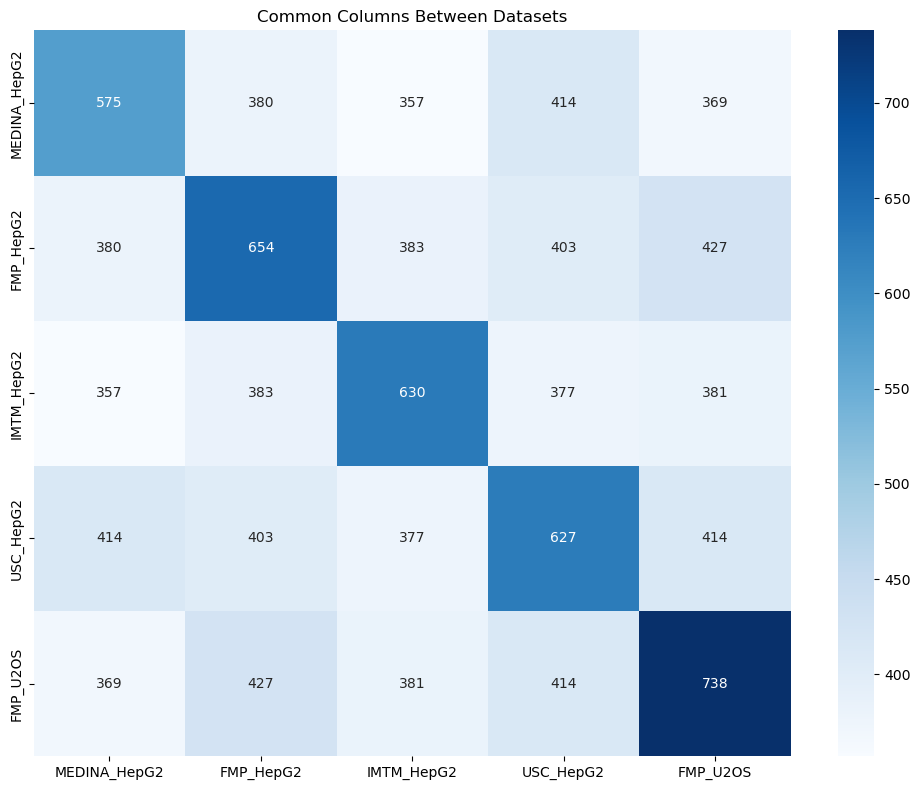

        Dataset  Total Features  Common Features  Lost Features  % Loss
4      FMP_U2OS             738              197            541   73.31
1     FMP_HepG2             654              197            457   69.88
2    IMTM_HepG2             630              197            433   68.73
3     USC_HepG2             627              197            430   68.58
0  MEDINA_HepG2             575              197            378   65.74


In [10]:
features = {
    "MEDINA_HepG2": extract_features(df_MEDINA_HepG2),
    "FMP_HepG2": extract_features(df_FMP_HepG2),
    "IMTM_HepG2": extract_features(df_IMTM_HepG2),
    "USC_HepG2": extract_features(df_USC_HepG2),
    "FMP_U2OS": extract_features(df_FMP_U2OS),
}
datasets = list(features.keys())

# create matrix of common features
overlap_matrix = pd.DataFrame(index=datasets, columns=datasets)

for i in datasets:
    for j in datasets:
        overlap_matrix.loc[i, j] = len(features[i] & features[j])

overlap_matrix = overlap_matrix.astype(int)

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Common Columns Between Datasets")
plt.tight_layout()
plt.show()

# find intersection of all features
common_features_all = set.intersection(*features.values())

summary = pd.DataFrame([
    {
        "Dataset": name,
        "Total Features": len(fset),
        "Common Features": len(fset & common_features_all),
        "Lost Features": len(fset - common_features_all),
        "% Loss": round(100 * len(fset - common_features_all) / len(fset), 2),
    }
    for name, fset in features.items()
])

print(summary.sort_values("% Loss", ascending=False))

We will have only 197 features if we merge all datasets. But for a start we could use one dataset with largest feature count: FMP_U2OS or FMP_HepG2.

Also, after merging, the data may be subject to the batch effect. 
It may manifest itself in the columns Metadata_Plate, Metadata_Cell_Line_Source, Metadata_Cell_Line. 
Let's study this effect right away

Start with Metadata_Plate

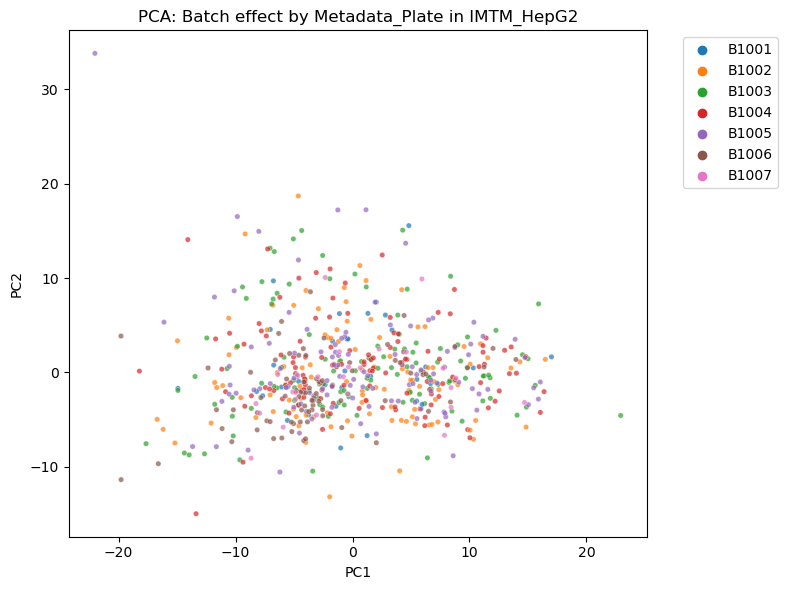

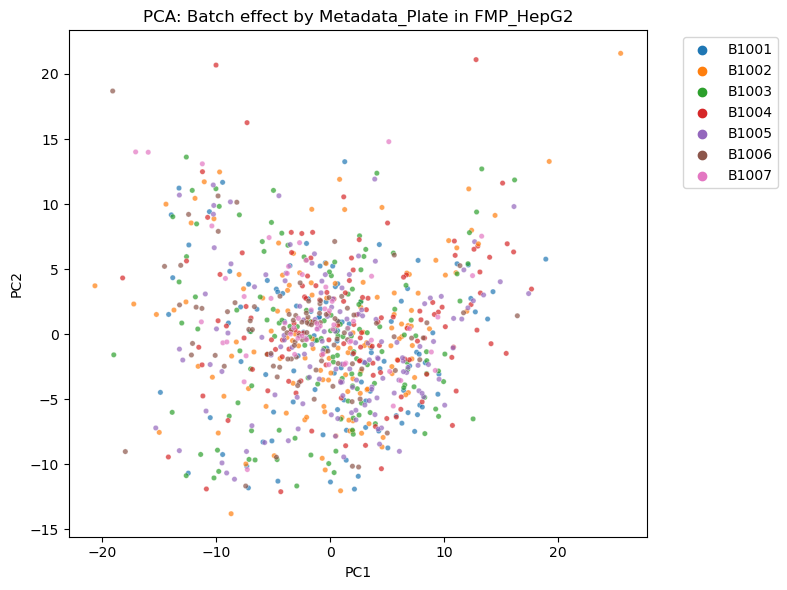

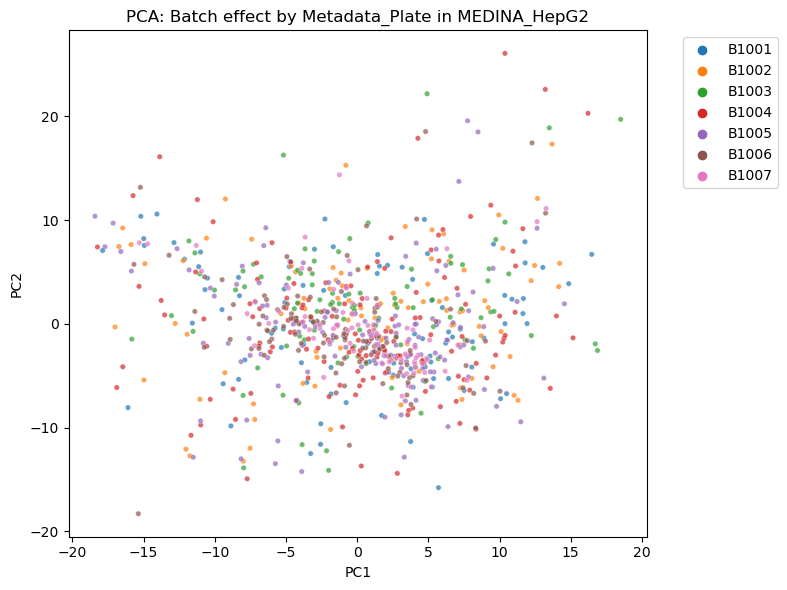

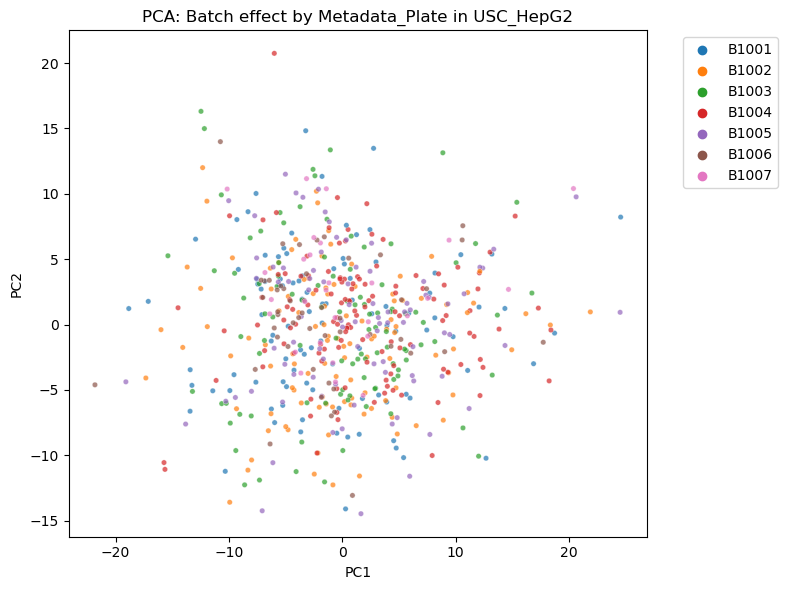

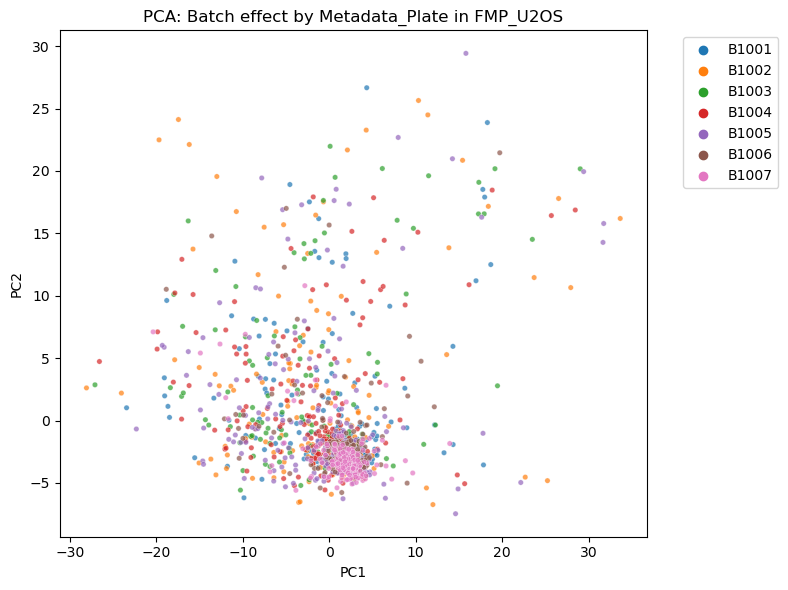

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to analyze batch effect using PCA
def analyze_plate_batch_effect(df, dataset_name, feature_names):
    df_clean = df.dropna(subset=feature_names)
    X = df_clean[feature_names]
    y = df_clean["Metadata_Plate"]

    # apply scaler
    X_scaled = StandardScaler().fit_transform(X)

    # for visialization purposes, we will use PCA with 2 components
    pca = PCA(n_components=2)
    # apply PCA
    X_pca = pca.fit_transform(X_scaled)

    df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    df_pca["Plate"] = y

    # plot the PCA
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Plate", s=15, alpha=0.7)
    plt.title(f"PCA: Batch effect by Metadata_Plate in {dataset_name}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# We will use the common features across all datasets
common_features = list(
    extract_features(df_FMP_HepG2) &
    extract_features(df_IMTM_HepG2) &
    extract_features(df_MEDINA_HepG2) &
    extract_features(df_FMP_U2OS) &
    extract_features(df_USC_HepG2)
)

analyze_plate_batch_effect(df_IMTM_HepG2, "IMTM_HepG2", common_features)
analyze_plate_batch_effect(df_FMP_HepG2, "FMP_HepG2", common_features)
analyze_plate_batch_effect(df_MEDINA_HepG2, "MEDINA_HepG2", common_features)
analyze_plate_batch_effect(df_USC_HepG2, "USC_HepG2", common_features)
analyze_plate_batch_effect(df_FMP_U2OS, "FMP_U2OS", common_features)

It's looks like FMP_U2OS has the batch effect for the plate B1007! We could remove it from our dataset.

Now we will check the source:

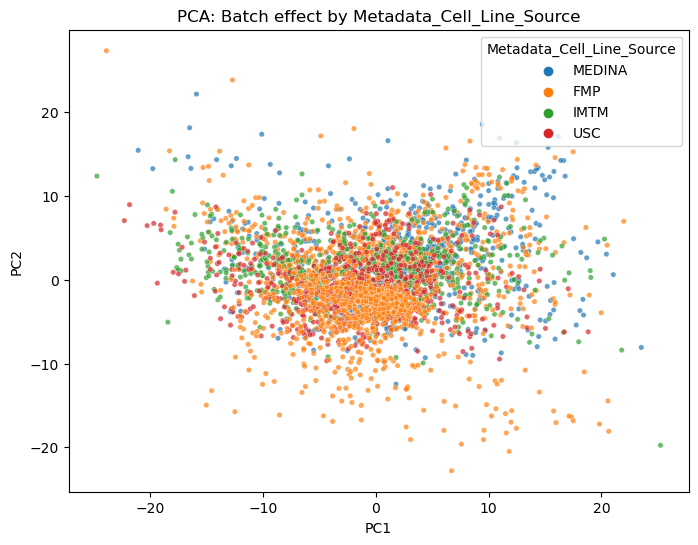

In [12]:
X = cell_lines_df[common_features]
y = cell_lines_df["Metadata_Cell_Line_Source"]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Metadata_Cell_Line_Source"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Metadata_Cell_Line_Source", s=15, alpha=0.7)
plt.title("PCA: Batch effect by Metadata_Cell_Line_Source")
plt.show()


It seems like batch-effect is present within FMP dataset. Let's check batch-effect of `Metadata_Cell_Line`:

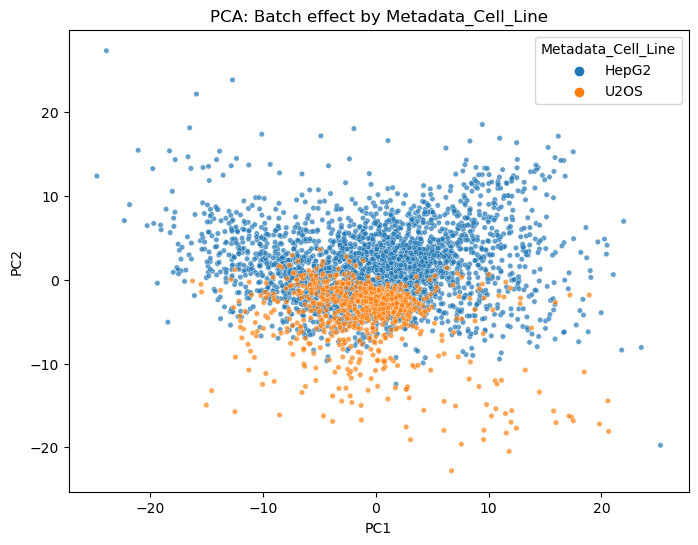

In [13]:
X = cell_lines_df[common_features]
y = cell_lines_df["Metadata_Cell_Line"]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Metadata_Cell_Line"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Metadata_Cell_Line", s=15, alpha=0.7)
plt.title("PCA: Batch effect by Metadata_Cell_Line")
plt.show()


Here we see strong batch-effect between HepG2 and U2OS. At this stage, I propose to abandon U2OS data.

### Let's see on the plots one more time, without U2OS data:

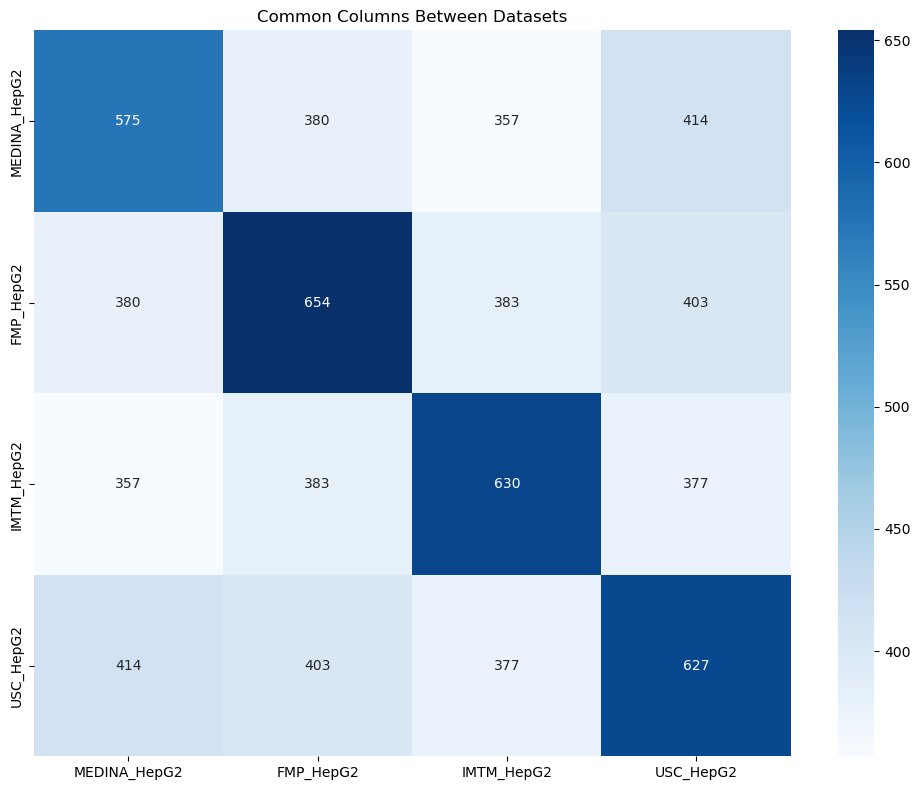

        Dataset  Total Features  Common Features  Lost Features  % Loss
1     FMP_HepG2             654              241            413   63.15
2    IMTM_HepG2             630              241            389   61.75
3     USC_HepG2             627              241            386   61.56
0  MEDINA_HepG2             575              241            334   58.09


In [14]:
features = {
    "MEDINA_HepG2": extract_features(df_MEDINA_HepG2),
    "FMP_HepG2": extract_features(df_FMP_HepG2),
    "IMTM_HepG2": extract_features(df_IMTM_HepG2),
    "USC_HepG2": extract_features(df_USC_HepG2),
}
datasets = list(features.keys())

# create matrix of common features
overlap_matrix = pd.DataFrame(index=datasets, columns=datasets)

for i in datasets:
    for j in datasets:
        overlap_matrix.loc[i, j] = len(features[i] & features[j])

overlap_matrix = overlap_matrix.astype(int)

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Common Columns Between Datasets")
plt.tight_layout()
plt.show()

# find intersection of all features
common_features_all = set.intersection(*features.values())

summary = pd.DataFrame([
    {
        "Dataset": name,
        "Total Features": len(fset),
        "Common Features": len(fset & common_features_all),
        "Lost Features": len(fset - common_features_all),
        "% Loss": round(100 * len(fset - common_features_all) / len(fset), 2),
    }
    for name, fset in features.items()
])

print(summary.sort_values("% Loss", ascending=False))

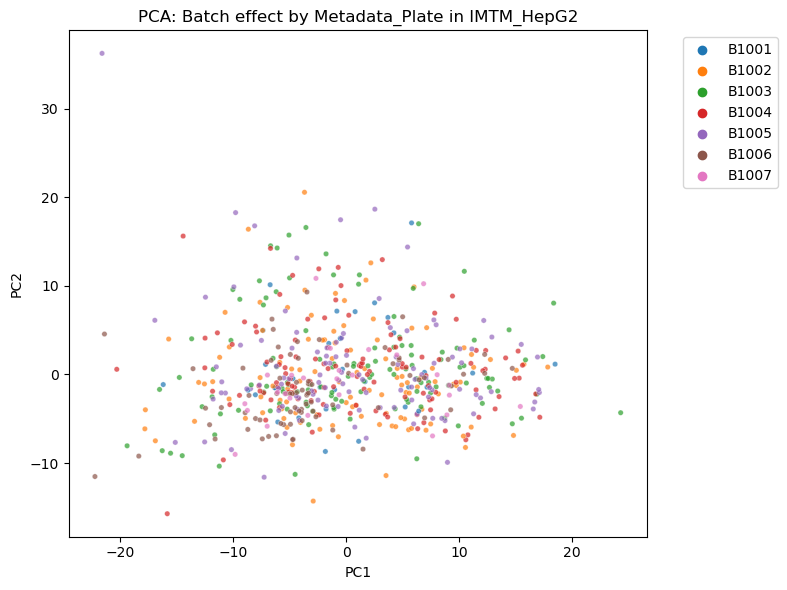

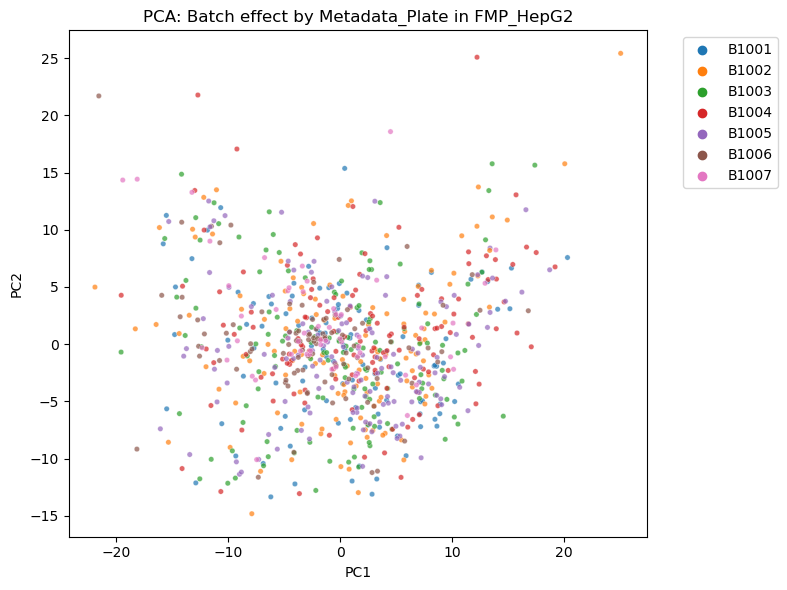

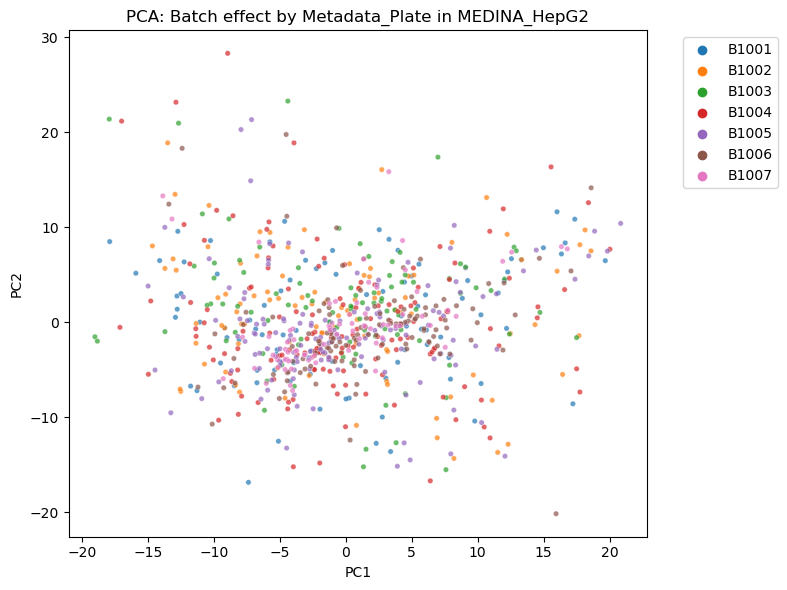

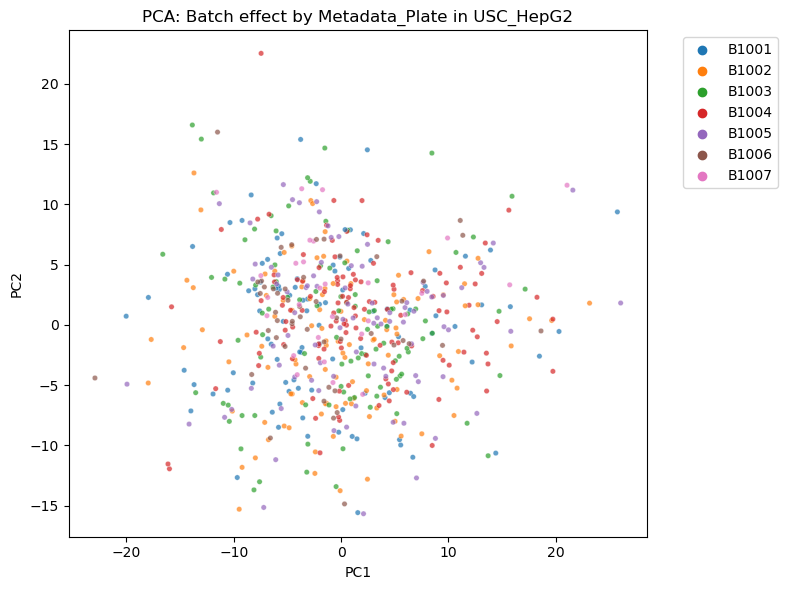

In [15]:
common_features = list(
    extract_features(df_FMP_HepG2) &
    extract_features(df_IMTM_HepG2) &
    extract_features(df_MEDINA_HepG2) &
    extract_features(df_USC_HepG2)
)

analyze_plate_batch_effect(df_IMTM_HepG2, "IMTM_HepG2", common_features)
analyze_plate_batch_effect(df_FMP_HepG2, "FMP_HepG2", common_features)
analyze_plate_batch_effect(df_MEDINA_HepG2, "MEDINA_HepG2", common_features)
analyze_plate_batch_effect(df_USC_HepG2, "USC_HepG2", common_features)

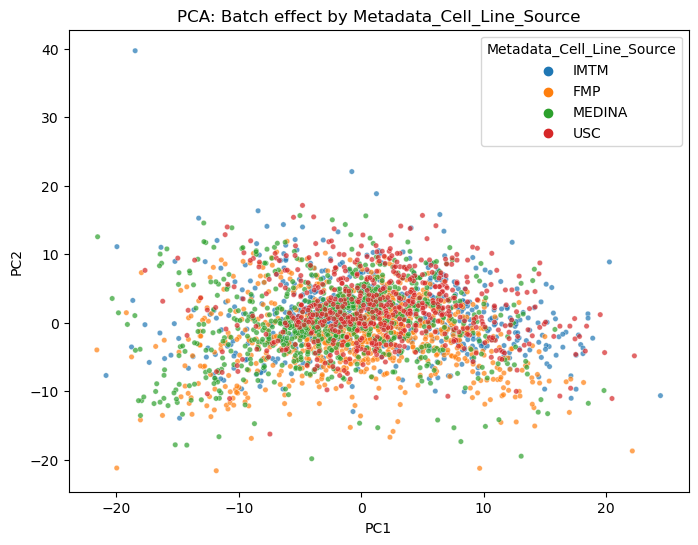

In [16]:
df_all = pd.concat([
    df_IMTM_HepG2.assign(Source="IMTM"),
    df_FMP_HepG2.assign(Source="FMP"),
    df_MEDINA_HepG2.assign(Source="MEDINA"),
    df_USC_HepG2.assign(Source="USC"),
], ignore_index=True)

common_features = list(set.intersection(
    extract_features(df_IMTM_HepG2),
    extract_features(df_FMP_HepG2),
    extract_features(df_MEDINA_HepG2),
    extract_features(df_USC_HepG2),
))

X = df_all[common_features]
y = df_all["Metadata_Cell_Line_Source"]

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Metadata_Cell_Line_Source"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Metadata_Cell_Line_Source", s=15, alpha=0.7)
plt.title("PCA: Batch effect by Metadata_Cell_Line_Source")
plt.show()


Now we don't see batch effect at all and we have 241 common features. We well merge aggregate all values by Metadata_EOS.

In [17]:
# concat all dataframes
cell_lines_dfs = [df_MEDINA_HepG2, df_FMP_HepG2, df_IMTM_HepG2, df_USC_HepG2] # no df_FMP_U2OS
cell_lines_df = pd.concat(cell_lines_dfs, ignore_index=True, sort=False)

# Create dataset with common features only
common_columns = set(cell_lines_dfs[0].columns)
for df in cell_lines_dfs[1:]:
    common_columns &= set(df.columns)

cell_lines_common_df = pd.concat([df[list(common_columns)] for df in cell_lines_dfs], ignore_index=True)
# Get the metadata columns
metadata_cols = ['Metadata_EOS', 'Metadata_Plate', 'Metadata_Concentration', 'Metadata_Partner', 'Metadata_Cell_Line', 'Metadata_Cell_Line_Source']
metadata_cols_existing = [col for col in metadata_cols if col in cell_lines_common_df.columns]
morphology_cols = [col for col in cell_lines_common_df.columns if col not in metadata_cols_existing]
# Sort the columns
new_column_order = metadata_cols_existing + morphology_cols
cell_lines_common_df = cell_lines_common_df[new_column_order]
# Save the dataframe
filename = save_path + str(date.today()) + "_cell_lines_common.csv"
cell_lines_common_df.to_csv(filename, index = False)

cell_lines_common_df

Metadata_EOS Metadata_Plate  Metadata_Concentration Metadata_Partner  \
0       EOS100001          B1001                      10       Bioactives   
1       EOS100002          B1001                      10       Bioactives   
2       EOS100005          B1001                      10       Bioactives   
3       EOS100009          B1001                      10       Bioactives   
4       EOS100012          B1001                      10       Bioactives   
...           ...            ...                     ...              ...   
2764  Tetrandrine          B1005                       5       Bioactives   
2765  Tetrandrine          B1006                       0       Bioactives   
2766  Tetrandrine          B1006                       5       Bioactives   
2767  Tetrandrine          B1007                       0       Bioactives   
2768  Tetrandrine          B1007                       5       Bioactives   

     Metadata_Cell_Line Metadata_Cell_Line_Source  Nuc_AreaShape_Zernike_6_6  \
0                 HepG2                    MEDINA                 -13.076729   
1                 HepG2                    MEDINA                  -6.121051   
2                 HepG2                    MEDINA                  -7.777577   
3                 HepG2                    MEDINA                  -2.746768   
4                 HepG2                    MEDINA                  -6.431020   
...                 ...                       ...                        ...   
2764              HepG2                       USC                  -1.934969   
2765              HepG2                       USC                  -2.801127   
2766              HepG2                       USC                  -1.617667   
2767              HepG2                       USC                  -4.339131   
2768              HepG2                       USC                  -0.792539   

      Nuc_Texture_Correlation_Mito_5_01_256  \
0                                 -0.075131   
1                                 -0.096092   
2                                  0.781603   
3                                 -0.195669   
4                                  1.613699   
...                                     ...   
2764                              -3.266231   
2765                              -1.502125   
2766                              -3.087787   
2767                              -2.902593   
2768                              -3.384340   

      Cyto_Intensity_LowerQuartileIntensity_ER  \
0                                    -3.806660   
1                                    -3.332405   
2                                    -2.461855   
3                                    -1.449472   
4                                    -5.139116   
...                                        ...   
2764                                  4.595003   
2765                                  3.433695   
2766                                  4.404864   
2767                                  4.520940   
2768                                  4.008061   

      Nuc_Neighbors_PercentTouching_1  ...  \
0                          -11.244612  ...   
1                           -4.885769  ...   
2                           -8.290206  ...   
3                           -3.620983  ...   
4                           -5.906924  ...   
...                               ...  ...   
2764                        -4.178958  ...   
2765                        -3.974975  ...   
2766                        -2.453201  ...   
2767                        -5.170111  ...   
2768                        -3.028865  ...   

      Nuc_RadialDistribution_FracAtD_DNA_1of4  Cells_AreaShape_Zernike_9_5  \
0                                    5.114269                    -0.202799   
1                                    1.603251                    -1.252296   
2                                    2.963389                    -0.685500   
3                                    1.639575                    -0.385411   
4         

Now we can finally group data by Metadata_EOS. We will use mean for aggregation:

In [18]:
df_cell_lines_common_agg = cell_lines_common_df.groupby("Metadata_EOS")[morphology_cols].mean().reset_index()

filename = save_path + str(date.today()) + "_cell_lines_common_agg.csv"
df_cell_lines_common_agg.to_csv(filename, index = False)

df_cell_lines_common_agg

Metadata_EOS  Nuc_AreaShape_Zernike_6_6  \
0       EOS100001                  -8.779441   
1       EOS100002                  -6.121051   
2       EOS100003                  -0.841283   
3       EOS100005                  -7.777577   
4       EOS100009                  -2.310455   
...           ...                        ...   
1113    EOS102439                  -7.151318   
1114    EOS102449                   1.827569   
1115    EOS102459                  -1.849635   
1116   Nocodazole                  -8.107095   
1117  Tetrandrine                  -2.887681   

      Nuc_Texture_Correlation_Mito_5_01_256  \
0                                  2.063814   
1                                 -0.096092   
2                                  3.043289   
3                                  0.781603   
4                                  0.083425   
...                                     ...   
1113                               2.822496   
1114                               0.133349   
1115                               1.349968   
1116                               2.289793   
1117                              -0.518902   

      Cyto_Intensity_LowerQuartileIntensity_ER  \
0                                    -3.468897   
1                                    -3.332405   
2                                    -1.163089   
3                                    -2.461855   
4                                    -1.188907   
...                                        ...   
1113                                 -0.193622   
1114                                  3.225831   
1115                                 -1.153168   
1116                                 -0.268450   
1117                                  1.407405   

      Nuc_Neighbors_PercentTouching_1  Nuc_Neighbors_AngleBetweenNeighbors_1  \
0                          -12.415849                              -2.870269   
1                           -4.885769                              -1.823292   
2                           -4.470534                              -3.757814   
3                           -8.290206                              -2.337916   
4                           -4.287093                              -1.612513   
...                               ...                                    ...   
1113                        -4.181278                              -1.689024   
1114                         0.231775                               0.632112   
1115                        -3.111229                               0.406279   
1116                       -12.230837                              -2.887902   
1117                        -5.236296                              -1.790131   

      Cyto_AreaShape_Zernike_9_7  Cells_AreaShape_Zernike_6_0  \
0                       0.502672                    -1.017270   
1                      -1.991138                     0.818538   
2                      -1.945677                    -0.630209   
3                      -2.168737                     1.314309   
4                      -1.311353                     0.339231   
...                          ...                          ...   
1113                    0.134334                     0.265747   
1114                    0.454872                     0.010330   
1115                    1.422053                     0.320771   
1116                   -1.825322                     0.189575   
1117                   -3.192017                     0.585530   

      Cyto_Texture_InfoMeas1_DNA_3_03_256  Cyto_AreaShape_Zernike_4_4  ...  \
0                                6.220757                    2.603157  ...   
1                                2.771862                    2.118787  ...   
2                                3.989770                   -0.408144  ...   
3                                3.665932                    2.241780  ...   
4                                2.681630                   -0.060198  ...   
...                                   ...           

In [19]:
len(df_cell_lines_common_agg['Metadata_EOS'].unique())

1118

Now we have dataset with 1118 unique compounds!

### Let's try another methods of aggregation

Probably the better way to handle same compounds within different sources, it's by calculating geometric mean.

Geometric mean works only with positive values.

In [20]:
[col for col in morphology_cols if (cell_lines_common_df[col] > 0).all()]

[]

All columns could have negative values. We could try to shift all values to be positive. After calculation of mean we will shift values back.

Will try to calculate mean by different stratigies:
- Mean
- Geometric mean
- Arithmetic–geometric mean
- Closest compound to geometric mean
- Closest compound to arithmetic–geometric mean

In [21]:
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate mean
def group_by_mean(df, group_col, feature_cols):
    return df.groupby(group_col)[feature_cols].mean().reset_index()

# Function to calculate geometric mean
def group_by_geometric_mean(df, group_col, feature_cols, eps=1e-6):
    # calculate the minimum value for each feature
    min_vals = df[feature_cols].min()
    shift = (-min_vals + eps).clip(lower=0)
    df_shifted = df.copy()
    df_shifted[feature_cols] = df[feature_cols] + shift

    result = []
    for key, group in df_shifted.groupby(group_col):
        geo = np.exp(np.log(group[feature_cols]).mean()) - shift
        result.append({group_col: key, **geo.to_dict()})
    return pd.DataFrame(result)

# Function to calculate arithmetic–geometric mean
def group_by_agm(df, group_col, feature_cols, eps=1e-6):
    min_vals = df[feature_cols].min()
    shift = (-min_vals + eps).clip(lower=0)
    df_shifted = df.copy()
    df_shifted[feature_cols] = df[feature_cols] + shift

    result = []
    for key, group in df_shifted.groupby(group_col):
        mean = group[feature_cols].mean()
        geo = np.exp(np.log(group[feature_cols]).mean())
        agm = np.sqrt(mean * geo) - shift
        result.append({group_col: key, **agm.to_dict()})
    return pd.DataFrame(result)

# Function to calculate closest to geometric mean
def closest_to_geometric_mean(df, group_col, feature_cols, eps=1e-6):
    min_vals = df[feature_cols].min()
    shift = (-min_vals + eps).clip(lower=0)
    df_shifted = df.copy()
    df_shifted[feature_cols] = df[feature_cols] + shift

    result = []
    for key, group in df_shifted.groupby(group_col):
        geo = np.exp(np.log(group[feature_cols]).mean())
        distances = cdist(group[feature_cols].values, [geo], metric='euclidean')
        closest_idx = distances.argmin()
        closest_row = group.iloc[closest_idx][feature_cols] - shift
        result.append({group_col: key, **closest_row.to_dict()})
    return pd.DataFrame(result)

# Function to calculate closest to arithmetic–geometric mean
def closest_to_agm(df, group_col, feature_cols, eps=1e-6):
    min_vals = df[feature_cols].min()
    shift = (-min_vals + eps).clip(lower=0)
    df_shifted = df.copy()
    df_shifted[feature_cols] = df[feature_cols] + shift

    result = []
    for key, group in df_shifted.groupby(group_col):
        mean = group[feature_cols].mean()
        geo = np.exp(np.log(group[feature_cols]).mean())
        agm = np.sqrt(mean * geo)
        distances = cdist(group[feature_cols].values, [agm], metric='euclidean')
        closest_idx = distances.argmin()
        closest_row = group.iloc[closest_idx][feature_cols] - shift
        result.append({group_col: key, **closest_row.to_dict()})
    return pd.DataFrame(result)

In [22]:
# Calculate different mean strategies
df_mean = group_by_mean(cell_lines_common_df, "Metadata_EOS", morphology_cols)
df_geometric_mean = group_by_geometric_mean(cell_lines_common_df, "Metadata_EOS", morphology_cols)
df_closest_geometric_mean = closest_to_geometric_mean(cell_lines_common_df, "Metadata_EOS", morphology_cols)
df_agm = group_by_agm(cell_lines_common_df, "Metadata_EOS", morphology_cols)
df_closest_agm = closest_to_agm(cell_lines_common_df, "Metadata_EOS", morphology_cols)

Now we should compare different strategies. Let's compare base dataset compounds with mean dataset by those metrics:
- L2 Distance / Euclidean Distance: This is the average Euclidean distance between the aggregated profile and all real samples in the group. It measures how far the aggregate is from actual observations.
- Cosine Similarity: This is the average cosine similarity between the aggregate and all real observations. It measures the directional alignment of feature vectors, regardless of their magnitude.
- Explained Variance: This is the portion of variance in the group that is explained by the aggregate vector. In other words: how well the aggregate captures the spread of the group.

In [23]:
# Function to evaluate aggregation strategies
def evaluate_aggregation_quality(df, group_col, feature_cols, df_mean, df_geometric_mean, df_closest_geometric_mean, df_agm, df_closest_agm):
    results = []

    for key, group in df.groupby(group_col):
        X = group[feature_cols].values

        row = {'group': key, 'n': len(group)}

        if key in df_mean[group_col].values:
            mean_vector = df_mean[df_mean[group_col] == key][feature_cols].values[0]
            row['mean_l2'] = np.mean(np.linalg.norm(X - mean_vector, axis=1))
            row['mean_cosine'] = cosine_similarity([mean_vector], X).mean()
            residual = X - mean_vector
            row['mean_explained_var'] = 1 - np.var(residual) / np.var(X)

        if key in df_geometric_mean[group_col].values:
            geo_vector = df_geometric_mean[df_geometric_mean[group_col] == key][feature_cols].values[0]
            row['geo_l2'] = np.mean(np.linalg.norm(X - geo_vector, axis=1))
            row['geo_cosine'] = cosine_similarity([geo_vector], X).mean()
            residual = X - geo_vector
            row['geo_explained_var'] = 1 - np.var(residual) / np.var(X)

        if key in df_closest_geometric_mean[group_col].values:
            closest_vector = df_closest_geometric_mean[df_closest_geometric_mean[group_col] == key][feature_cols].values[0]
            row['closest_geo_l2'] = np.mean(np.linalg.norm(X - closest_vector, axis=1))
            row['closest_geo_cosine'] = cosine_similarity([closest_vector], X).mean()
            residual = X - closest_vector
            row['closest_geo_explained_var'] = 1 - np.var(residual) / np.var(X)

        if key in df_agm[group_col].values:
            closest_vector = df_agm[df_agm[group_col] == key][feature_cols].values[0]
            row['agm_l2'] = np.mean(np.linalg.norm(X - closest_vector, axis=1))
            row['agm_cosine'] = cosine_similarity([closest_vector], X).mean()
            residual = X - closest_vector
            row['agm_explained_var'] = 1 - np.var(residual) / np.var(X)

        if key in df_closest_agm[group_col].values:
            closest_vector = df_closest_agm[df_closest_agm[group_col] == key][feature_cols].values[0]
            row['closest_agm_l2'] = np.mean(np.linalg.norm(X - closest_vector, axis=1))
            row['closest_agm_cosine'] = cosine_similarity([closest_vector], X).mean()
            residual = X - closest_vector
            row['closest_agm_explained_var'] = 1 - np.var(residual) / np.var(X)

        results.append(row)

    return pd.DataFrame(results)

In [24]:
result_df = evaluate_aggregation_quality(cell_lines_common_df, 'Metadata_EOS', morphology_cols, df_mean, df_geometric_mean, df_closest_geometric_mean, df_agm, df_closest_agm)

summary = result_df[[col for col in result_df.columns if col.endswith(('_l2', '_cosine', '_explained_var'))]].mean()
summary_df = summary.reset_index()
summary_df.columns = ['metric', 'value']

summary_df['agg'] = summary_df['metric'].str.extract(r'^(.*)_(?:l2|cosine|explained_var)$')
summary_df['type'] = summary_df['metric'].str.extract(r'_(l2|cosine|explained_var)$')

summary_df.pivot(index='agg', columns='type', values='value').round(4)

type         cosine  explained_var       l2
agg                                        
agm          0.8973         0.7975  15.4252
closest_agm  0.8298         0.6432  16.6908
closest_geo  0.8294         0.6428  16.7098
geo          0.8964         0.7962  15.5135
mean         0.8983         0.7993  15.3100

Here we see that the simple mean is better on all metrics. When using it, the aggregation data is most similar to the other data. This can be explained by the fact that our data was pre-normalized.

While comparing aggregation strategies using metrics like Euclidean distance, cosine similarity, and explained variance provides insight into how representative the aggregate is of its original group, it’s important to acknowledge a key limitation: this setup inherently favors averaging-based methods. In particular, the simple mean aggregation is optimized by design to minimize Euclidean distance and maximize explained variance under linear assumptions. As such, these metrics primarily capture how “central” or “typical” an aggregate is, rather than how useful it might be for downstream tasks like classification or clustering. Therefore, this comparison should be interpreted as an evaluation of representativeness, not necessarily of usefulness.

To better assess practical value, further analysis with downstream performance metrics (e.g., model accuracy, F1 score) is required. Let's save extra data for future comparasing:

In [ ]:
filename = save_path + str(date.today()) + "_cell_lines_exp_mean.csv"
df_mean.to_csv(filename, index = False)

filename = save_path + str(date.today()) + "_cell_lines_exp_geometric_mean.csv"
df_geometric_mean.to_csv(filename, index = False)

filename = save_path + str(date.today()) + "_cell_lines_exp_closest_geometric_mean.csv"
df_closest_geometric_mean.to_csv(filename, index = False)

filename = save_path + str(date.today()) + "_cell_lines_exp_agm.csv"
df_agm.to_csv(filename, index = False)

filename = save_path + str(date.today()) + "_cell_lines_exp_closest_agm.csv"
df_closest_agm.to_csv(filename, index = False)

## Summary
In conclusion, this notebook successfully loaded and merged multiple cell painting datasets, despite the initial challenge of differing column counts. Through careful data manipulation and analysis, we were able to harmonize the datasets and extract valuable insights. The analysis provided a deeper understanding of the cell line characteristics and their variations across different sources. The visualizations generated offered a clear representation of the data, aiding in the interpretation of complex patterns and trends. Implemented and stored several aggregation methods: arithmetic mean, geometric mean, AGM, and nearest-compound selection.

Output: aggregated morphological feature tables ready for fusion with molecular and label data.